In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Decomposition

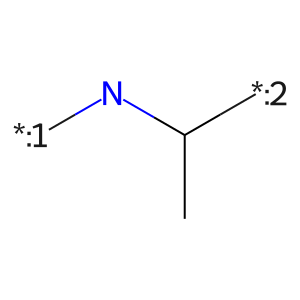

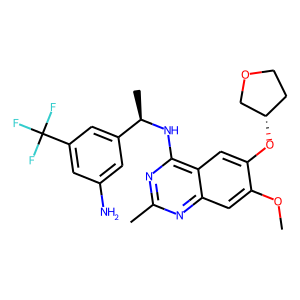

[{'Core': <rdkit.Chem.rdchem.Mol at 0x7f8889104990>,
  'R1': <rdkit.Chem.rdchem.Mol at 0x7f8868468390>,
  'R2': <rdkit.Chem.rdchem.Mol at 0x7f88891c5bd0>}]

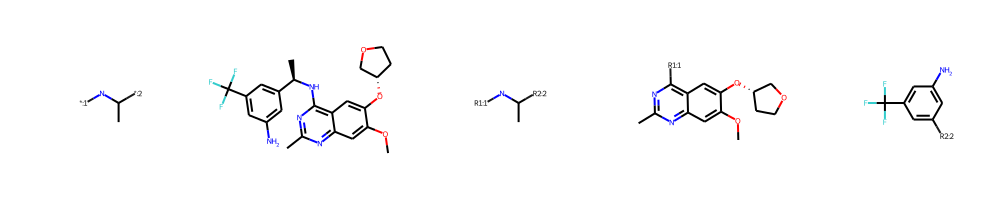

,Core,R1,R2
0,CC(N[*:1])[*:2],COc1cc2nc(C)nc([*:1])c2cc1O[C@H]1CCOC1,Nc1cc(C(F)(F)F)cc([*:2])c1


In [2]:
# EXAMPLE
# create core pattern
smarts = '[*:1]-N-[C](-C)-[*:2]'
patt = Chem.MolFromSmarts(smarts)
test = Chem.MolFromSmiles('CC1=NC(N[C@@H](C2=CC(C(F)(F)F)=CC(N)=C2)C)=C3C=C(O[C@@H]4COCC4)C(OC)=CC3=N1')

patt
test

# decompose
from rdkit.Chem import rdRGroupDecomposition as rdRGD
res,unmatched = rdRGD.RGroupDecompose([patt],[test])
res

Chem.Draw.MolsToGridImage([patt, test, res[0]['Core'], res[0]['R1'], res[0]['R2']], molsPerRow=5, useSVG=True)

# decompose as smiles and create dataframe 
res,unmatched = rdRGD.RGroupDecompose([patt],[test], asSmiles=True)
pd.DataFrame(res)